# Netflix Rating Predicton #
### Name: Dolev,  id: 000-000-000 ###



## Part 1: Data Analasys ##

In [1]:
# imports 
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import seaborn as sns
import numpy as np
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import os

In [2]:

# load data
netflix_features_df = pd.read_csv(os.path.join("data", "netflix_features.csv"))
netflix_labels_df = pd.read_csv(os.path.join("data", "netflix_labels.csv"))

netflix_features_df = netflix_features_df.drop(['N/A'], axis=1)
netflix_features_df

,netflixid,title,released_year,released_month,runtime,awards_win,awards_nominations,language,country,num_experienced_actors,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,81312527,Little Big Women,2020,11,123,1,5,"Mandarin, Min Nan",Taiwan,0,...,0,0,0,0,0,0,0,0,0,0
1,81380262,Tim Maia,2014,10,140,6,14,"Portuguese, English",Brazil,0,...,0,0,0,1,0,0,0,0,0,0
2,81337241,Doob: No Bed of Roses,2017,11,85,2,3,Bengali,Bangladesh,0,...,0,0,0,0,0,0,0,0,0,0
3,81382129,Money,2017,6,86,16,26,"English, Spanish","USA, Spain",0,...,0,1,0,0,0,0,0,1,0,0
4,81382199,Starring Maja,2009,9,91,0,3,Swedish,Ireland Sweden,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,81190919,A Prominent Patient,2017,3,114,20,8,"Czech, Slovak, English, French","Czech Republic, Slovakia, Germany",2,...,0,0,0,0,0,0,0,0,0,0
765,81168944,The Wanderers: The Quest of The Demon Hunter,2017,6,106,3,0,"English, Romanian, German, Korean",Romania,0,...,0,1,0,0,0,0,0,1,0,0
766,80159876,Girls und Panzer der Film,2016,11,119,0,1,Japanese,Japan,2,...,0,0,0,0,0,0,0,0,0,0
767,81003510,Arctic,2019,1,98,0,2,"English, Danish",Iceland,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
netflix_features_df.describe()

,netflixid,released_year,released_month,runtime,awards_win,awards_nominations,num_experienced_actors,num_experienced_creators,Action,Adventure,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,7.690000e+02,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,...,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,7.730030e+07,2010.708713,7.000000,106.089727,6.660598,13.652796,0.954486,0.062419,0.150845,0.111834,...,0.022107,0.087126,0.001300,0.192458,0.070221,0.007802,0.023407,0.208062,0.039012,0.015605
std,1.257650e+07,12.855201,3.486208,23.492818,17.830087,35.658542,2.179870,0.252601,0.358131,0.315367,...,0.147126,0.282203,0.036061,0.394487,0.255686,0.088043,0.151291,0.406186,0.193749,0.124021
min,2.355270e+05,1934.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.022314e+07,2007.000000,4.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.113507e+07,2017.000000,8.000000,104.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.126032e+07,2019.000000,10.000000,118.000000,6.000000,10.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.141053e+07,2021.000000,12.000000,209.000000,275.000000,348.000000,17.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


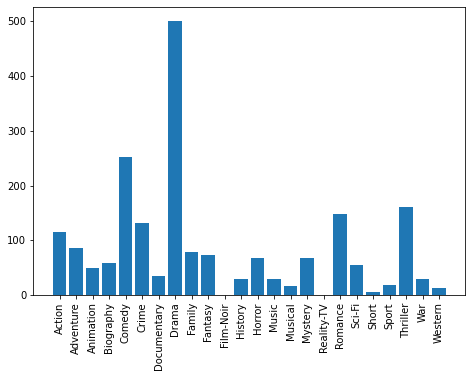

In [4]:
# Bar plot Genres

genres = ['Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short',
       'Sport', 'Thriller', 'War', 'Western']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
movies = [netflix_features_df[genre].sum() for genre in genres]
ax.bar(genres, movies)
plt.xticks(rotation = 90) 
plt.show()

In [5]:
# remove genres with low variance
netflix_features_df = netflix_features_df.drop(['Film-Noir', 'Reality-TV', 'Short'], axis=1)

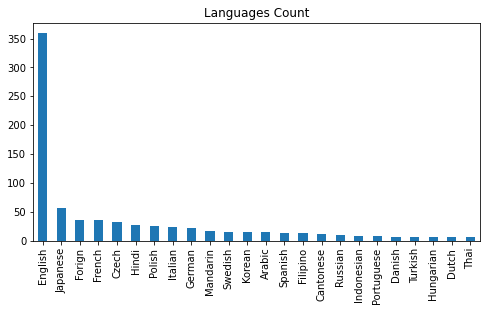

In [6]:
# map language from list to a single value (first value in the list is the main language)

netflix_features_df['language'] = netflix_features_df.apply(lambda instance: instance['language'].split()[0].replace(',', ''), axis=1)
language_set = Counter(netflix_features_df.language)

# replace rare languages with forigen 
forign_lang = [lang for lang, count in language_set.items() if count <= 5]
forign_label = 'Forign' 
netflix_features_df['language'] = netflix_features_df.apply(
    lambda instance: forign_label if instance['language'] in forign_lang else instance['language'], axis=1)
netflix_features_df['language'].value_counts().plot(kind='bar', figsize=(8,4), title="Languages Count")

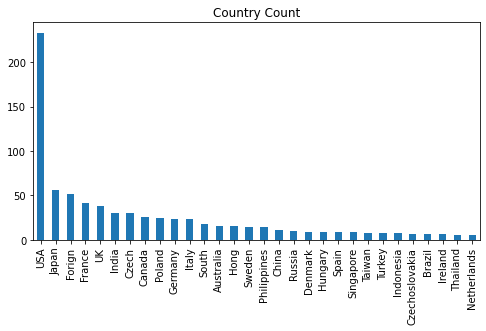

In [7]:
# map contry from list to a single value (first value in the list is the main language)

netflix_features_df['country'] = netflix_features_df.apply(lambda instance: instance['country'].split()[0].replace(',', ''), axis=1)
country_count = Counter(netflix_features_df.country)

# replace rare languages with forigen 
forign_country = [lang for lang, count in country_count.items() if count <= 5]
forign_label = 'Forign' 
netflix_features_df['country'] = netflix_features_df.apply(
    lambda instance: forign_label if instance['country'] in forign_country else instance['country'], axis=1)
netflix_features_df['country'].value_counts().plot(kind='bar', figsize=(8,4), title="Country Count")

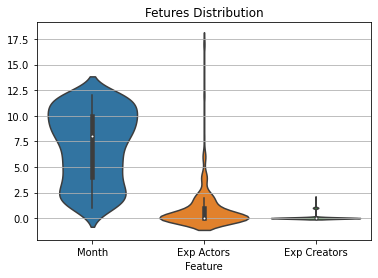

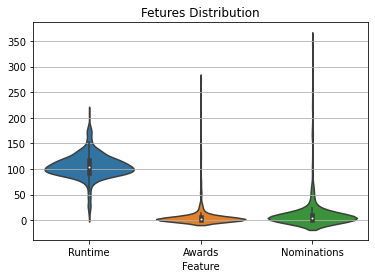

In [8]:
def plot_violin_features(df):
    fig, axes = plt.subplots()
    sns.violinplot(data=df, ax = axes, scale="count")
    axes.set_title('Fetures Distribution')
    axes.yaxis.grid(True)
    axes.set_xlabel('Feature')
#     plt.xticks(rotation = 90) 
    plt.show()

low_values_df = netflix_features_df[['released_month', 'num_experienced_actors', 'num_experienced_creators']]
low_values_df = low_values_df.rename(columns = {'released_month': 'Month', 
                                                'num_experienced_actors': 'Exp Actors', 
                                                'num_experienced_creators': 'Exp Creators'}, inplace = False)

plot_violin_features(low_values_df)
high_values_df = netflix_features_df[['runtime', 'awards_win', 'awards_nominations']]
high_values_df = high_values_df.rename(columns = {'runtime': 'Runtime', 
                                                'awards_win': 'Awards', 
                                                'awards_nominations': 'Nominations'}, inplace = False)
plot_violin_features(high_values_df)

## Part 2: Prepare Features ##

In [9]:
# convert to one_hot
language_one_hot = pd.get_dummies(netflix_features_df['language'], prefix='language')
country_one_hot = pd.get_dummies(netflix_features_df['country'], prefix='country')
netflix_X_df = netflix_features_df.drop(['language', 'country', 'netflixid', 'title'], axis=1)
netflix_X_df = pd.concat([netflix_X_df, language_one_hot, country_one_hot], axis=1)
netflix_labels_df = netflix_labels_df.drop(['netflixid'], axis=1)
netflix_X_df

,released_year,released_month,runtime,awards_win,awards_nominations,num_experienced_actors,num_experienced_creators,Action,Adventure,Animation,...,country_Russia,country_Singapore,country_South,country_Spain,country_Sweden,country_Taiwan,country_Thailand,country_Turkey,country_UK,country_USA
0,2020,11,123,1,5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2014,10,140,6,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,11,85,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,6,86,16,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2009,9,91,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,2017,3,114,20,8,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
765,2017,6,106,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
766,2016,11,119,0,1,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
767,2019,1,98,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Split data to train and test (0.7 - train, 0.3 - test)
msk = np.random.rand(len(netflix_X_df)) < 0.7
train_x = netflix_X_df[msk]
test_x = netflix_X_df[~msk]
train_y = netflix_labels_df[msk]
test_y = netflix_labels_df[~msk]

print("train:", len(train_x), "\ntest:", len(test_x))

train: 570 
test: 199


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002050E84AF88>]],
      dtype=object)

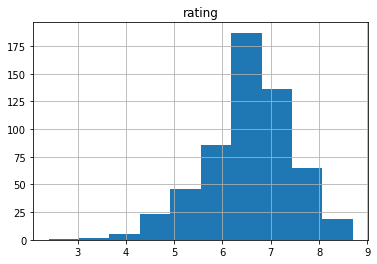

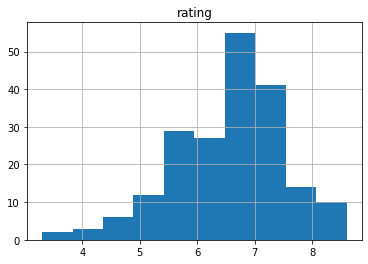

In [11]:
# check that train and test has the same distribution
train_y.hist(column='rating')
test_y.hist(column='rating')

## Part 3: Train Model 1 - Linear Regression##

In [12]:
regressor_linear = Ridge(fit_intercept=False)
regressor_linear.fit(train_x.to_numpy(), train_y.to_numpy().reshape(-1))

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

## Part 3: Evaluate Linear Regression Results ##

In [13]:
train_pred_linear = regressor_linear.predict(train_x)
test_pred_linear = regressor_linear.predict(test_x)

In [14]:
print("MSE - Linear Regression - Train:\t", metrics.mean_squared_error(train_pred_linear, train_y).round(4))
print("MSE - Linear Regression - Test:\t\t", metrics.mean_squared_error(test_pred_linear, test_y).round(4))

MSE - Linear Regression - Train:	 0.5052
MSE - Linear Regression - Test:		 0.6901


In [15]:
test_linear_results_df = pd.DataFrame(data=np.hstack([test_y, test_pred_linear.reshape(test_y.shape)]), 
                               columns=["Y", "Pred"])
pd.options.display.max_rows = 500
test_linear_results_df.style.background_gradient(cmap='Greens')

,Y,Pred
0,7.700000,6.761360
1,7.900000,6.434614
2,7.400000,6.093319
3,6.100000,6.514238
4,6.800000,6.152391
5,4.500000,6.133504
6,7.000000,6.486610
7,6.500000,6.781773
8,6.400000,6.587129
9,5.900000,6.368624


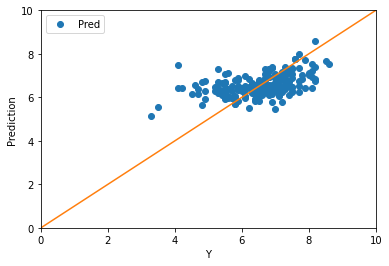

In [16]:
test_linear_results_df.plot(x='Y', y='Pred', style='o')
plt.plot(list(range(11)), list(range(11)))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.ylabel("Prediction")
plt.show()

## Part 4: Train Model 2 - Random Forest##

In [17]:
regressor_forest = RandomForestRegressor(n_estimators=20, random_state=0, verbose=1)
regressor_forest.fit(train_x.to_numpy(), train_y.to_numpy().reshape(-1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=0, verbose=1,
                      warm_start=False)

## Part 4: Evaluate Random Forest Results ##

In [18]:
train_pred_forest = regressor_forest.predict(train_x)
test_pred_forest = regressor_forest.predict(test_x)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [19]:
print("MSE - Random Forest - Train:\t", metrics.mean_squared_error(train_pred_forest, train_y).round(4))
print("MSE - Random Forest - Test:\t", metrics.mean_squared_error(test_pred_forest, test_y).round(4))

MSE - Random Forest - Train:	 0.093
MSE - Random Forest - Test:	 0.5367


In [20]:
test_forest_results_df = pd.DataFrame(data=np.hstack([test_y, test_pred_forest.reshape(test_y.shape)]), 
                               columns=["Y", "Pred"])
pd.options.display.max_rows = 500
test_forest_results_df.style.background_gradient(cmap='Greens')


,Y,Pred
0,7.700000,6.595000
1,7.900000,7.220000
2,7.400000,6.395000
3,6.100000,6.110000
4,6.800000,6.840000
5,4.500000,5.680000
6,7.000000,6.045000
7,6.500000,6.380000
8,6.400000,6.585000
9,5.900000,6.075000


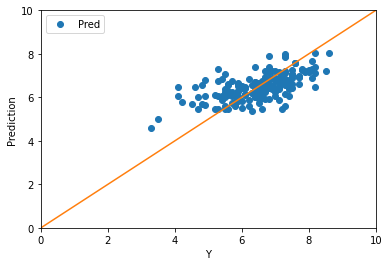

In [21]:
test_forest_results_df.plot(x='Y', y='Pred', style='o')
plt.plot(list(range(11)), list(range(11)))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.ylabel("Prediction")
plt.show()

In [22]:
feture_importance_df = pd.DataFrame(data=np.vstack([train_x.columns, regressor_forest.feature_importances_.round(5)]).T, 
                                    columns=["Feature", "Importance"])
feture_importance_df = feture_importance_df.sort_values(["Importance"], ascending=False).reset_index(drop=True)
feture_importance_df = feture_importance_df.head(10)
feture_importance_df.style.background_gradient(cmap='Blues', subset=pd.IndexSlice[:, ['Importance']])

,Feature,Importance
0,awards_win,0.246280
1,runtime,0.124380
2,released_year,0.098640
3,released_month,0.061010
4,awards_nominations,0.058970
5,Documentary,0.044210
6,Drama,0.041580
7,num_experienced_actors,0.031650
8,Animation,0.023370
9,Thriller,0.015820
